## Filters

### 3.4 Load and represent image

Load the image `LymphocyteGray.jpg` with the imread command. Plot this image as well as its amplitude and phase spectra. In order to better visualize the low amplitude spectral components, you can use a **dB** scale. Discuss the graphs.

Text(0.5, 1.0, 'Phase')

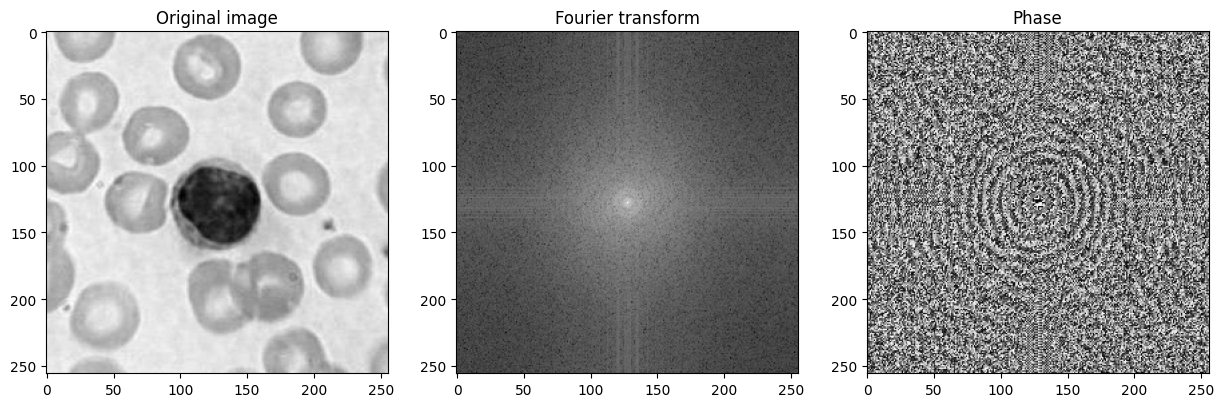

In [1]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt

# Load image
im0 = plt.imread('TDImage/LymphocyteGray.jpg')
Lx = im0.shape[0]   # number of pixels in x-direction
Ly = im0.shape[1]   # number of pixels in y-direction


# FT in 2D
ff0=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(im0)))
# arrange that in subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(im0, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(10 * np.log10(np.abs(ff0)), cmap='gray')   # dB scale
ax[1].set_title('Fourier transform')
ax[2].imshow(np.angle(ff0), cmap='gray')
ax[2].set_title('Phase')

### 3.5 Inverse FT

Going back fromt the FT to the original image using `ifft2` on the **absolute value of the FT**.

Text(0.5, 1.0, 'Inverse FT of abs(FT)')

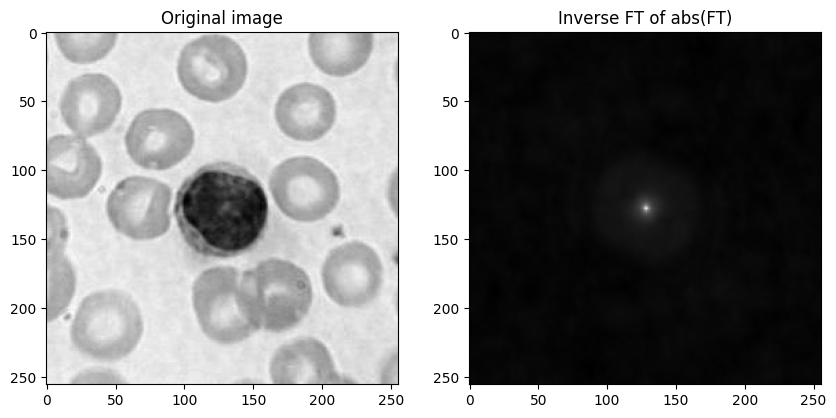

In [2]:
# Compute inverse FT
im1=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(np.abs(ff0))))
# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im0, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(np.abs(im1), cmap='gray')
ax[1].set_title('Inverse FT of abs(FT)')


#### So, which is the value of the phase in image processing?

### 3.6 Low Pass Filter

Create a low pass filter,
$$F_{LP} (i,j) = \left\{ \begin{array}{ll} 1 & \text{if} \; (i-Lx/2)^2 + (j-Ly/2)^2 \leq r^2 \\ \\ 0 & \text{otherwise} \end{array} \right.$$
where we set the radius to be $r=20$.

In [3]:
# LP filter creation
lp_filter = np.zeros(im0.shape)
# Parameters definition
r = 20
for i in range(Lx):
    for j in range(Ly):
        if (i-Lx/2)**2 + (j-Ly/2)**2 < r**2:
            lp_filter[i,j] = 1

Plot it using the `imagesc` matlab function, which is akin to setting a determined extent and aspect.

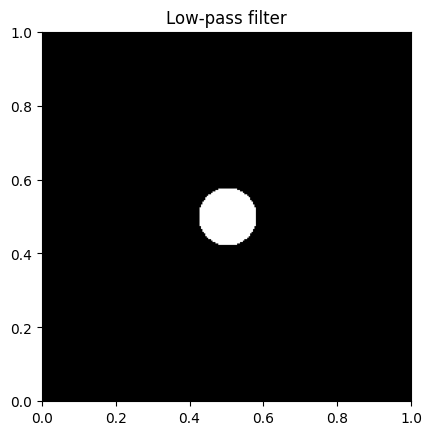

In [4]:
# Plot the filter
plt.imshow(lp_filter, cmap='gray', extent=[0, 1, 0, 1])
plt.title('Low-pass filter')
plt.show()

Apply the low pass filter to an image and plot the spectrum.

C:\Users\propietario\AppData\Local\Temp\ipykernel_19340\486361849.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10 * np.log10(np.abs(lp_ff0)), cmap='gray')


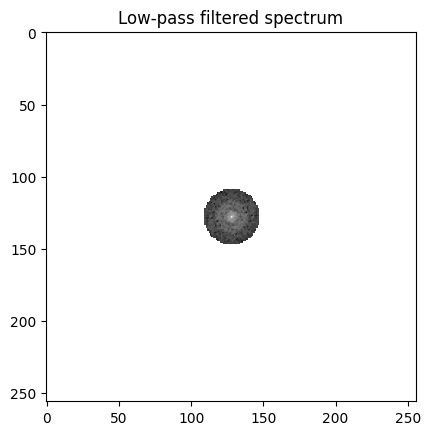

In [5]:
lp_ff0 = lp_filter * ff0

# Plot the spectrum in dB scale
plt.imshow(10 * np.log10(np.abs(lp_ff0)), cmap='gray')
plt.title('Low-pass filtered spectrum')
plt.show()

Calculate the inverse FT and draw it.

Text(0.5, 1.0, 'Filtered image')

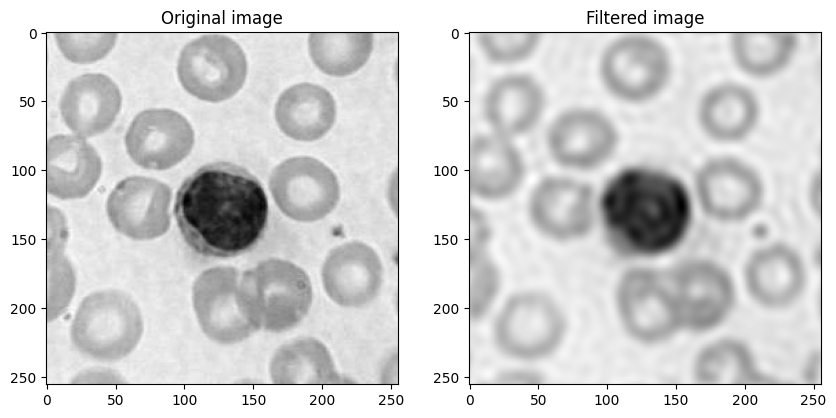

In [6]:
lp_im0 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(lp_ff0)))

# Plot the filtered image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im0, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(np.abs(lp_im0), cmap='gray')
ax[1].set_title('Filtered image')

#### Discuss the result of this image and the potiential use of this filter.

### 3.7 High Pass Filter

Create a high pass filter,
$$F_{HP} (i,j) = \left\{ \begin{array}{ll} 0 & \text{if} \; (i-Lx/2)^2 + (j-Ly/2)^2 \leq r^2 \\ \\ 1 & \text{otherwise} \end{array} \right.$$
where we set the radius to be $r=20$.

In [7]:
# HP filter creation
hp_filter = np.ones(im0.shape)
# Parameters definition
r = 20
for i in range(Lx):
    for j in range(Ly):
        if (i-Lx/2)**2 + (j-Ly/2)**2 < r**2:
            hp_filter[i,j] = 0

Plot it using the `imagesc` matlab function, which is akin to setting a determined extent and aspect.

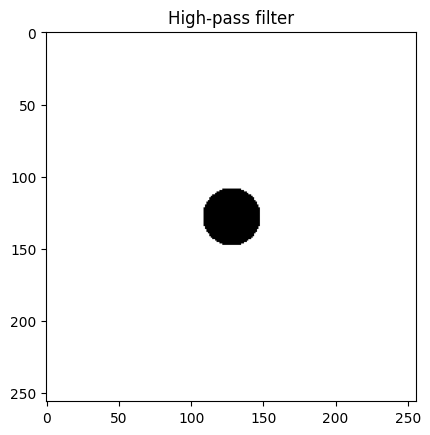

In [8]:
# Plot the filter
plt.imshow(hp_filter, cmap='gray')
plt.title('High-pass filter')
plt.show()

Apply the high pass filter to an image and plot the spectrum.

C:\Users\propietario\AppData\Local\Temp\ipykernel_19340\1920375739.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10 * np.log10(np.abs(hp_ff0)), cmap='gray')


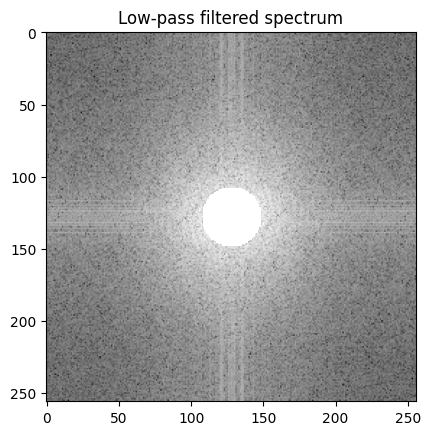

In [9]:
hp_ff0 = hp_filter * ff0

# Plot the spectrum in dB scale
plt.imshow(10 * np.log10(np.abs(hp_ff0)), cmap='gray')
plt.title('Low-pass filtered spectrum')
plt.show()

Calculate the inverse FT and draw it.

Text(0.5, 1.0, 'Filtered image')

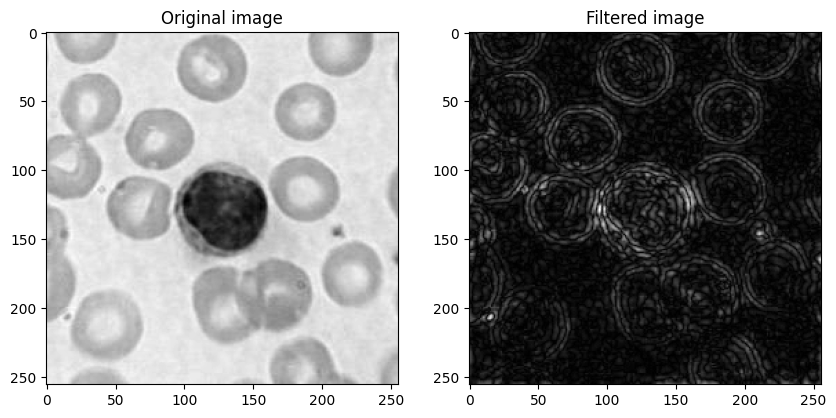

In [10]:
hp_im0 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(hp_ff0)))

# Plot the filtered image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im0, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(np.abs(hp_im0), cmap='gray')
ax[1].set_title('Filtered image')

#### Which characteristic in the filter shape leads to the visible oscillations in the filtered image?

### 3.8 Same analysis for the Gaussian filter and Butterworth filter
Create a Gaussian filter,
$$G_{LP} (i,j) = \exp{\left(- \frac{(i - Lx/2)^2 + (j - Ly/2)^2}{\sigma^2} \right)}$$
where we set $\sigma=20$.

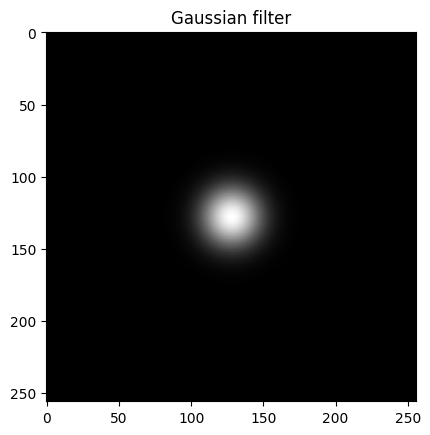

In [11]:
# HP filter creation
gg_filter = np.ones(im0.shape)
# Parameters definition
sig = 20
for i in range(Lx):
    for j in range(Ly):
        gg_filter[i,j] = np.exp(-((i-Lx/2)**2 + (j-Ly/2)**2) / sig**2)

# Plot the filter
plt.imshow(gg_filter, cmap='gray')
plt.title('Gaussian filter')
plt.show()

Apply the Gaussian filter to an image and plot the spectrum.

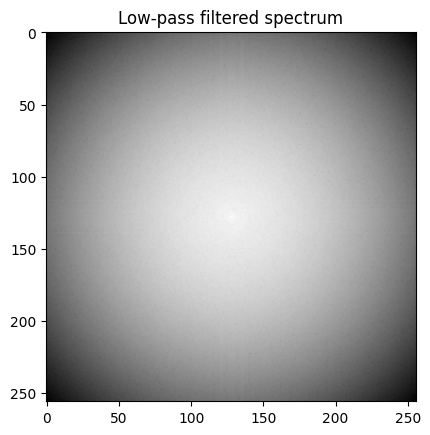

In [12]:
gg_ff0 = gg_filter * ff0

# Plot the spectrum in dB scale
plt.imshow(10 * np.log10(np.abs(gg_ff0)), cmap='gray')
plt.title('Low-pass filtered spectrum')
plt.show()

Calculate the inverse FT and draw it.

Text(0.5, 1.0, 'Filtered image')

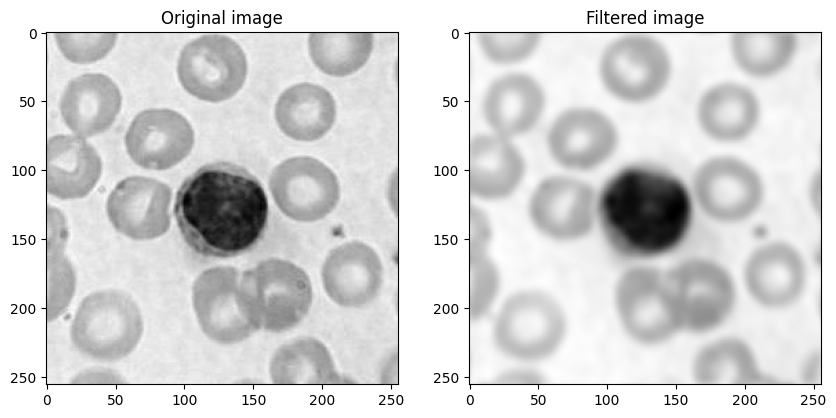

In [13]:
gg_im0 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(gg_ff0)))

# Plot the filtered image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im0, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(np.abs(gg_im0), cmap='gray')
ax[1].set_title('Filtered image')

and the Butterworth filter,
$$B_{LP} (i,j) = \frac{1}{1 + \left( \frac{(i-Lx/2)^2 + (j-Ly/2)^2}{\tau^2}\right)^n} $$
where we set $\tau=20$, and $n$ is the order of the filter.

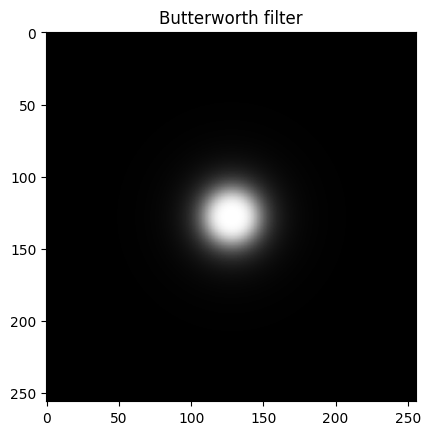

In [14]:
# Butterworth filter creation
bw_filter = np.ones(im0.shape)
# Parameters definition
tau = 20
n = 2   # Order of the filter
for i in range(Lx):
    for j in range(Ly):
        bw_filter[i,j] = 1 / (1 + (((i-Lx/2)**2 + (j-Ly/2)**2) / tau**2) ** n)

# Plot the filter
plt.imshow(bw_filter, cmap='gray')
plt.title('Butterworth filter')
plt.show()

Apply the Butterworth filter to an image and plot the spectrum.

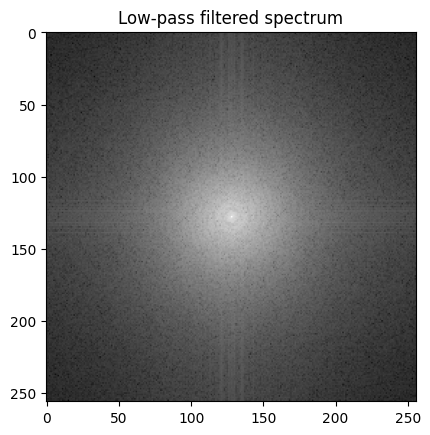

In [15]:
bw_ff0 = bw_filter * ff0

# Plot the spectrum in dB scale
plt.imshow(10 * np.log10(np.abs(bw_ff0)), cmap='gray')
plt.title('Low-pass filtered spectrum')
plt.show()

Calculate the inverse FT and draw it.

Text(0.5, 1.0, 'Filtered image')

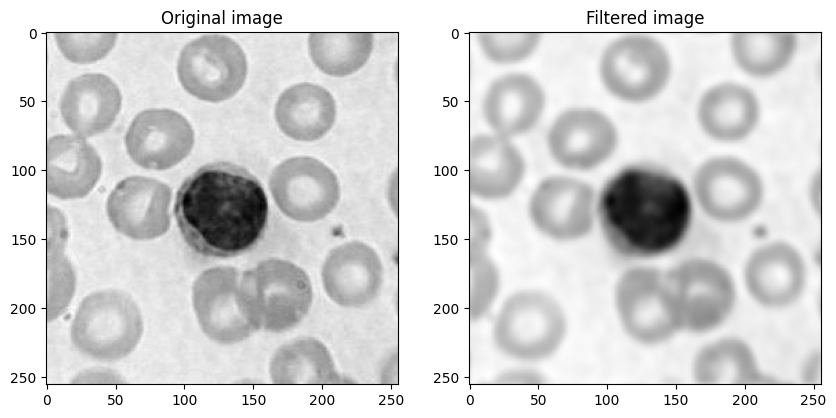

In [16]:
bw_im0 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(bw_ff0)))

# Plot the filtered image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im0, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(np.abs(bw_im0), cmap='gray')
ax[1].set_title('Filtered image')

#### What are the advantages of such filters compared to the rectangular one?

### 3.9 Load other images and compare amplitude spectra

Link their spectral characteristics to the spatial features of the images.

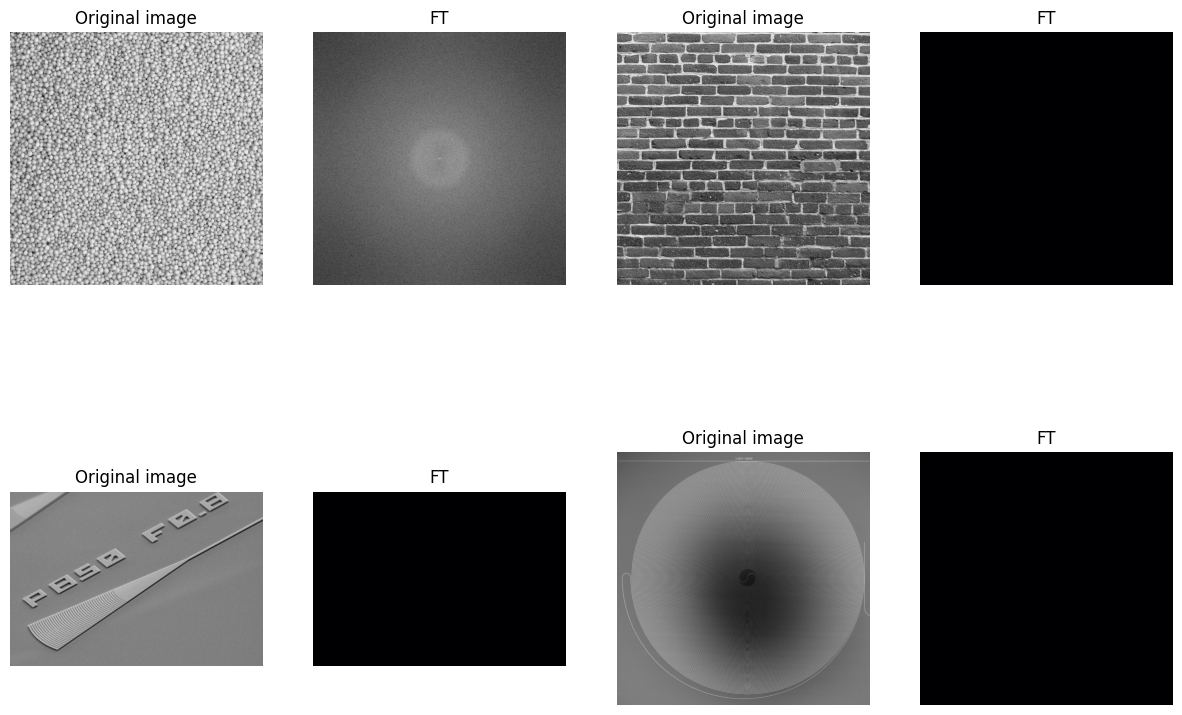

In [23]:
# Load different images and plot them and spectra
im1 = plt.imread('TDImage/Amaranth.jpg')
im2 = plt.imread('TDImage/Bricks.jpg')
im3 = plt.imread('TDImage/Coupleur.jpg')
im4 = plt.imread('TDImage/Spiral.jpg')

# FT in 2D
ff1=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(im1)))
ff2=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(im2[:,:,0])))
ff3=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(im3[:,:,0])))
ff4=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(im4[:,:,0])))
# arrange that in subplots
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
ax[0,0].imshow(im1, cmap='gray')
ax[0,0].set_title('Original image')
ax[0,0].axis('off')
ax[0,1].imshow(10 * np.log10(np.abs(ff1)), cmap='gray')   # dB scale
ax[0,1].set_title('FT')
ax[0,1].axis('off')
ax[0,2].imshow(im2)
ax[0,2].set_title('Original image')
ax[0,2].axis('off')
ax[0,3].imshow(np.abs(ff2), cmap='inferno')
ax[0,3].set_title('FT')
ax[0,3].axis('off')
ax[1,0].imshow(im3)
ax[1,0].set_title('Original image')
ax[1,0].axis('off')
ax[1,1].imshow(np.abs(ff3), cmap='inferno')   # dB scale
ax[1,1].set_title('FT')
ax[1,1].axis('off')
ax[1,2].imshow(im4)
ax[1,2].set_title('Original image')
ax[1,2].axis('off')
ax[1,3].imshow(np.abs(ff4), cmap='inferno')
ax[1,3].set_title('FT')
ax[1,3].axis('off')
plt.show()